In [1]:
import numpy as np
import pickle
from sklearn.datasets import load_iris
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ncart import NCARClassifier

In [2]:
data = load_iris()  
X = data.data.astype(np.float32)
y = data.target
feature_names = data.feature_names

In [3]:
model = NCARClassifier(epochs=500, n_trees=8, n_layers=2, n_selected=6,
                       data_parallel=True, gpu_ids=[0, 1])
model.fit(X, y)

On Device: cuda [0, 1]
Multi-class classification
Epoch 0: Train Loss 1.103035
Epoch 1: Train Loss 1.097560
Epoch 2: Train Loss 1.096977
Epoch 3: Train Loss 1.094660
Epoch 4: Train Loss 1.090189
Epoch 5: Train Loss 1.082665
Epoch 6: Train Loss 1.078108
Epoch 7: Train Loss 1.075262
Epoch 8: Train Loss 1.068783
Epoch 9: Train Loss 1.067114
Epoch 10: Train Loss 1.060854
Epoch 11: Train Loss 1.058462
Epoch 12: Train Loss 1.056984
Epoch 13: Train Loss 1.055429
Epoch 14: Train Loss 1.047049
Epoch 15: Train Loss 1.047033
Epoch 16: Train Loss 1.040378
Epoch 17: Train Loss 1.036760
Epoch 18: Train Loss 1.031949
Epoch 19: Train Loss 1.030784
Epoch 20: Train Loss 1.028249
Epoch 21: Train Loss 1.021738
Epoch 22: Train Loss 1.018918
Epoch 23: Train Loss 1.020548
Epoch 24: Train Loss 1.019919
Epoch 25: Train Loss 1.012062
Epoch 26: Train Loss 1.008698
Epoch 27: Train Loss 1.002006
Epoch 28: Train Loss 1.005194
Epoch 29: Train Loss 1.000874
Epoch 30: Train Loss 0.999184
Epoch 31: Train Loss 0.994782


([1.1030347347259521,
  1.0975596904754639,
  1.0969769954681396,
  1.0946602821350098,
  1.0901886224746704,
  1.082665205001831,
  1.0781079530715942,
  1.0752620697021484,
  1.0687826871871948,
  1.0671144723892212,
  1.0608543157577515,
  1.0584616661071777,
  1.056984305381775,
  1.0554286241531372,
  1.0470492839813232,
  1.0470331907272339,
  1.040378212928772,
  1.036759614944458,
  1.0319486856460571,
  1.0307843685150146,
  1.0282485485076904,
  1.0217375755310059,
  1.0189183950424194,
  1.0205483436584473,
  1.01991868019104,
  1.0120620727539062,
  1.0086981058120728,
  1.0020055770874023,
  1.005193829536438,
  1.0008739233016968,
  0.9991843700408936,
  0.9947816729545593,
  0.9923490285873413,
  0.9924069046974182,
  0.9881854057312012,
  0.9851906299591064,
  0.9835634231567383,
  0.9799417853355408,
  0.9756669998168945,
  0.9758189916610718,
  0.9746429324150085,
  0.9709557890892029,
  0.9672448635101318,
  0.9670857787132263,
  0.9661027789115906,
  0.9617719650268

In [4]:
importance = model.get_importance()

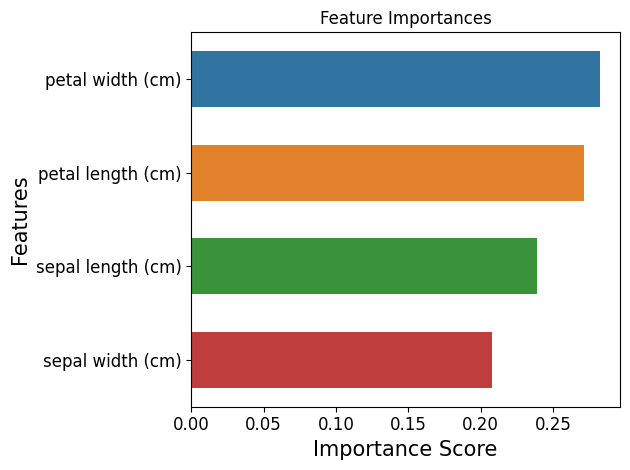

In [5]:
# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances using Seaborn
plt.figure()
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, width=0.6)
plt.title('Feature Importances', fontsize=12)
plt.xlabel('Importance Score', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()